Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize it and then build a model to fit it at over 85% accuracy.

In [7]:
# Import necessary utilities
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [49]:
# Create dataset using sklearn's make_moons()
(X, y) = make_moons(n_samples=200)

X.shape, y.shape

((200, 2), (200,))

In [50]:
# Check our data 
X[:5]

array([[ 1.88883545,  0.04177348],
       [-0.92836793,  0.37166246],
       [ 0.12615062,  0.01380326],
       [ 0.90292654,  0.42979491],
       [ 0.85798341,  0.51367739]])

In [51]:
np.bincount(y)

array([100, 100])

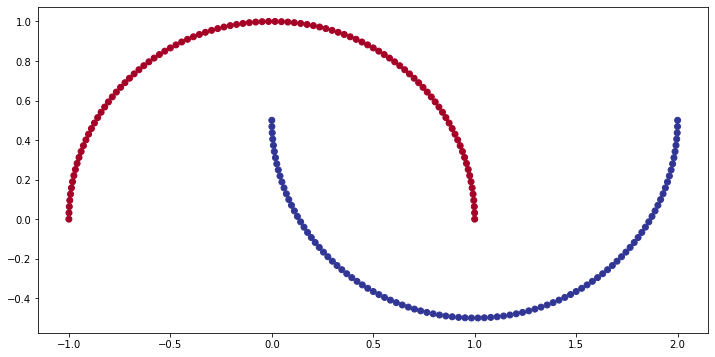

In [52]:
# Plot our data
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [53]:
# Check min and max values of our features
np.min(X), np.max(X)

(-1.0, 2.0)

In [54]:
# Split the data into training and test labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

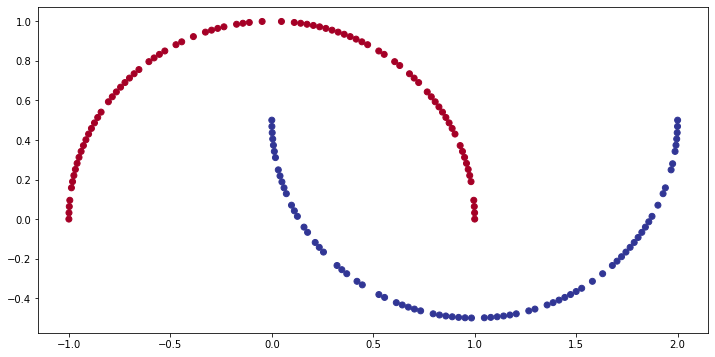

In [75]:
# Plot training data
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu);

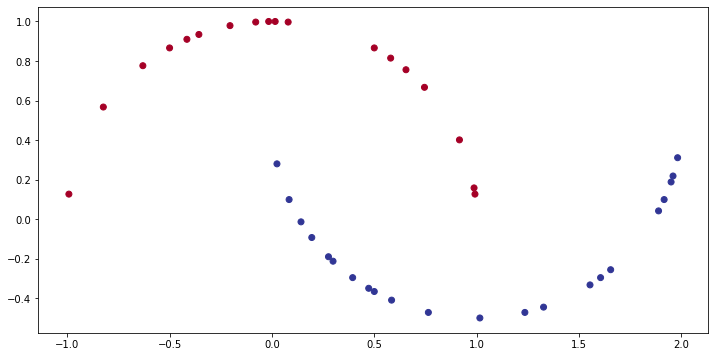

In [76]:
# Plot test data
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu);

Let's build a model to train on non-normalized data

In [55]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 62ms/step - loss: 0.7101 - accuracy: 0.4125 - val_loss: 0.7088 - val_accuracy: 0.4250
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.7054 - accuracy: 0.4313 - val_loss: 0.7047 - val_accuracy: 0.4250
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.7011 - accuracy: 0.4437 - val_loss: 0.7006 - val_accuracy: 0.4250
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 0.6968 - accuracy: 0.4625 - val_loss: 0.6970 - val_accuracy: 0.4500
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.4812 - val_loss: 0.6938 - val_accuracy: 0.4500
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 0.6896 - accuracy: 0.4938 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6863 - accuracy: 0.5063 - val_loss: 0.6882 - val_accuracy: 0.5000
Epoch 8/100
5/5 [===

In [56]:
# Evaluate our model
model_1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.4230 - accuracy: 0.9000


[0.4230291247367859, 0.8999999761581421]

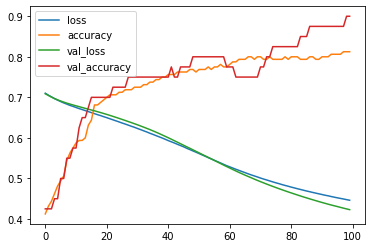

In [57]:
# Plot loss curve
pd.DataFrame(history_1.history).plot()
plt.legend();

Let's add a learning rate scheduler to check for optimal learning rate

In [58]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

# Fit the model
history_2 = model_2.fit(X_train, 
            y_train,
            epochs=100,
            callbacks=[lr_scheduler],
            validation_data=(X_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 56ms/step - loss: 0.6699 - accuracy: 0.7125 - val_loss: 0.6577 - val_accuracy: 0.7000 - lr: 1.0000e-04
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 0.6695 - accuracy: 0.7125 - val_loss: 0.6572 - val_accuracy: 0.7000 - lr: 1.1220e-04
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.6691 - accuracy: 0.7125 - val_loss: 0.6567 - val_accuracy: 0.7000 - lr: 1.2589e-04
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6686 - accuracy: 0.7125 - val_loss: 0.6561 - val_accuracy: 0.7000 - lr: 1.4125e-04
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6681 - accuracy: 0.7188 - val_loss: 0.6554 - val_accuracy: 0.7000 - lr: 1.5849e-04
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 0.6675 - accuracy: 0.7188 - val_loss: 0.6546 - val_accuracy: 0.7000 - lr: 1.7783e-04
Epoch 7/100
5/5 [==============================] - 0s 13ms

In [59]:
# Evaluate our model
model_2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 2.1371e-06 - accuracy: 1.0000


[2.137054934792104e-06, 1.0]

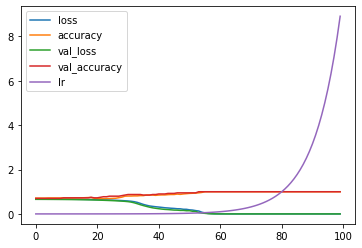

In [60]:
# Plot loss curve
pd.DataFrame(history_2.history).plot()
plt.legend();

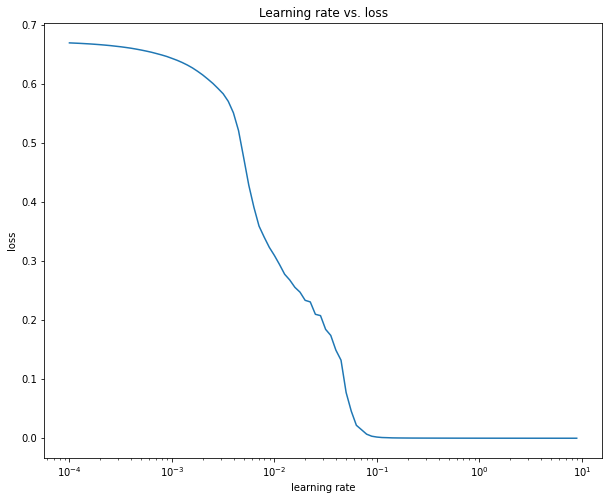

In [61]:
# Plot learning rate vs loss
lrs = 1e-4 * 10 ** (tf.range(100)/20)
plt.figure(figsize=(10, 8))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs. loss");

The ideal learning rate is somewhere around 1e-2. Let's use it in final model

In [63]:
# Set random seed
tf.random.set_seed(42)

# Create the model
ideal_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
ideal_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=["accuracy"])

# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

# Fit the model
ideal_model_history = ideal_model.fit(X_train,
                                      y_train,
                                      epochs=100,
                                      callbacks=[early_stopping],
                                      validation_data=(X_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 54ms/step - loss: 0.7034 - accuracy: 0.2937 - val_loss: 0.6786 - val_accuracy: 0.4250
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6704 - accuracy: 0.4437 - val_loss: 0.6561 - val_accuracy: 0.4250
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6477 - accuracy: 0.5000 - val_loss: 0.6345 - val_accuracy: 0.6250
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6192 - accuracy: 0.7312 - val_loss: 0.6072 - val_accuracy: 0.6500
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 0.5911 - accuracy: 0.7688 - val_loss: 0.5771 - val_accuracy: 0.7000
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 0.5599 - accuracy: 0.8000 - val_loss: 0.5465 - val_accuracy: 0.8000
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 0.5311 - accuracy: 0.8188 - val_loss: 0.5168 - val_accuracy: 0.8500
Epoch 8/100
5/5 [===

In [64]:
# Evaluate our model
ideal_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0297 - accuracy: 1.0000


[0.02968246303498745, 1.0]

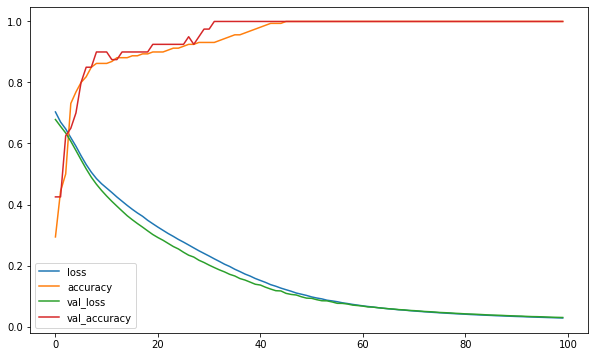

In [65]:
# Let's see loss curve
pd.DataFrame(ideal_model_history.history).plot(figsize=(10, 6))
plt.legend();

Since we had so much data in such a condensed space, the model is able to predict with accuracy of 100%, but let's still visualize some metrics

In [66]:
# Create plot_confusion matrix function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show();

2/2 [==============================] - 0s 7ms/step


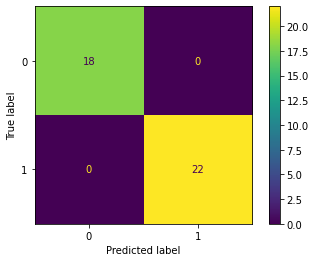

In [83]:
# Make predictions and plot confusion matrix
y_probs = ideal_model.predict(X_test)
y_preds = tf.squeeze(tf.round(y_probs)).numpy()
show_confusion_matrix(y_true=y_test, y_pred=y_preds)

According to the confusion matrix, precision, recall and f1-score are all equal to 1, so our model perfectly learned the patterns

In [84]:
y_preds.shape

(40,)

In [85]:
y_preds

array([0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1.], dtype=float32)

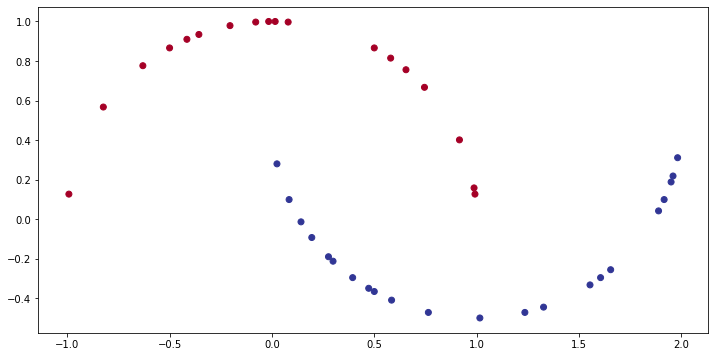

In [90]:
# Lets plot the predictions
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_test[:, 0], X_test[:, 1], c=y_preds, cmap=plt.cm.RdYlBu);